In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import joblib
import os

In [57]:
# Setting up visualization preferences
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [58]:
# Load data
data = pd.read_csv('../data/customer_churn.csv')



In [59]:
# Data Exploration and Initial Analysis
print("Data Overview:\n", data.head())
print("\nData Summary:\n", data.info())
print("\nMissing Values:\n", data.isnull().sum())
print("\nClass Distribution:\n", data['Churn'].value_counts(normalize=True))

Data Overview:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies     

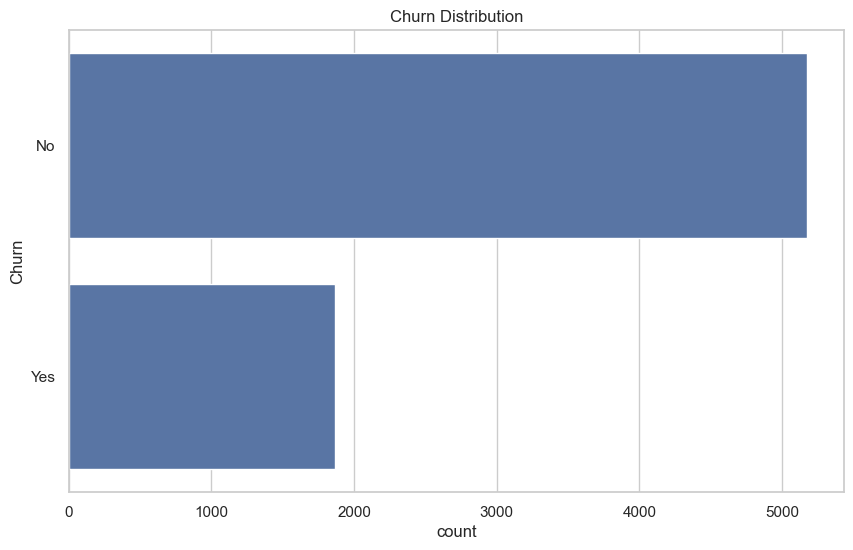

In [60]:
# Visualize Churn Distribution
sns.countplot(data['Churn'])
plt.title('Churn Distribution')
plt.show()

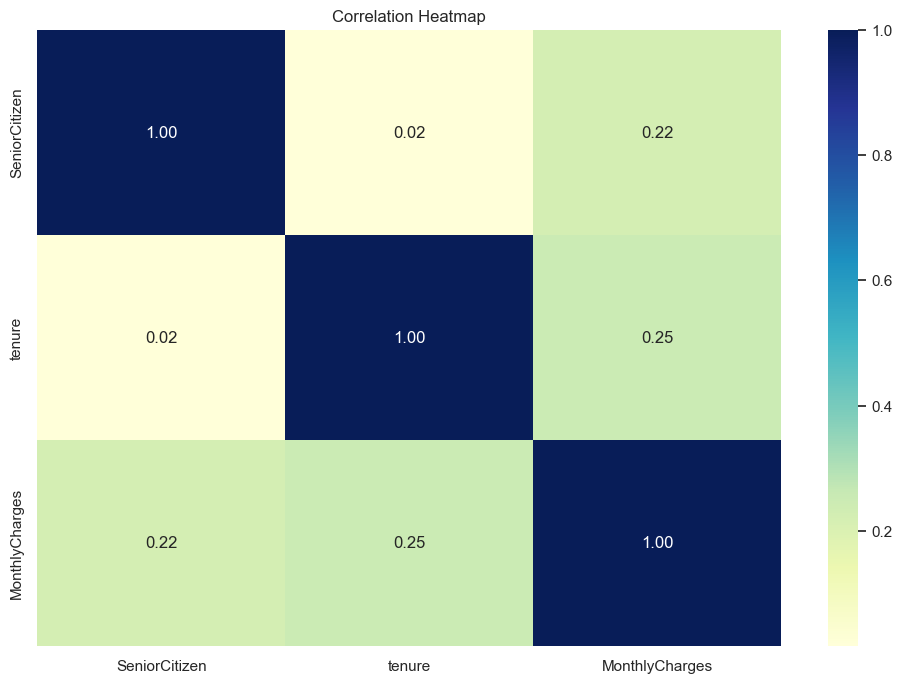

In [61]:
# Correlation Heatmap
data = data.drop(columns=['customerID'])
# Exclude non-numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

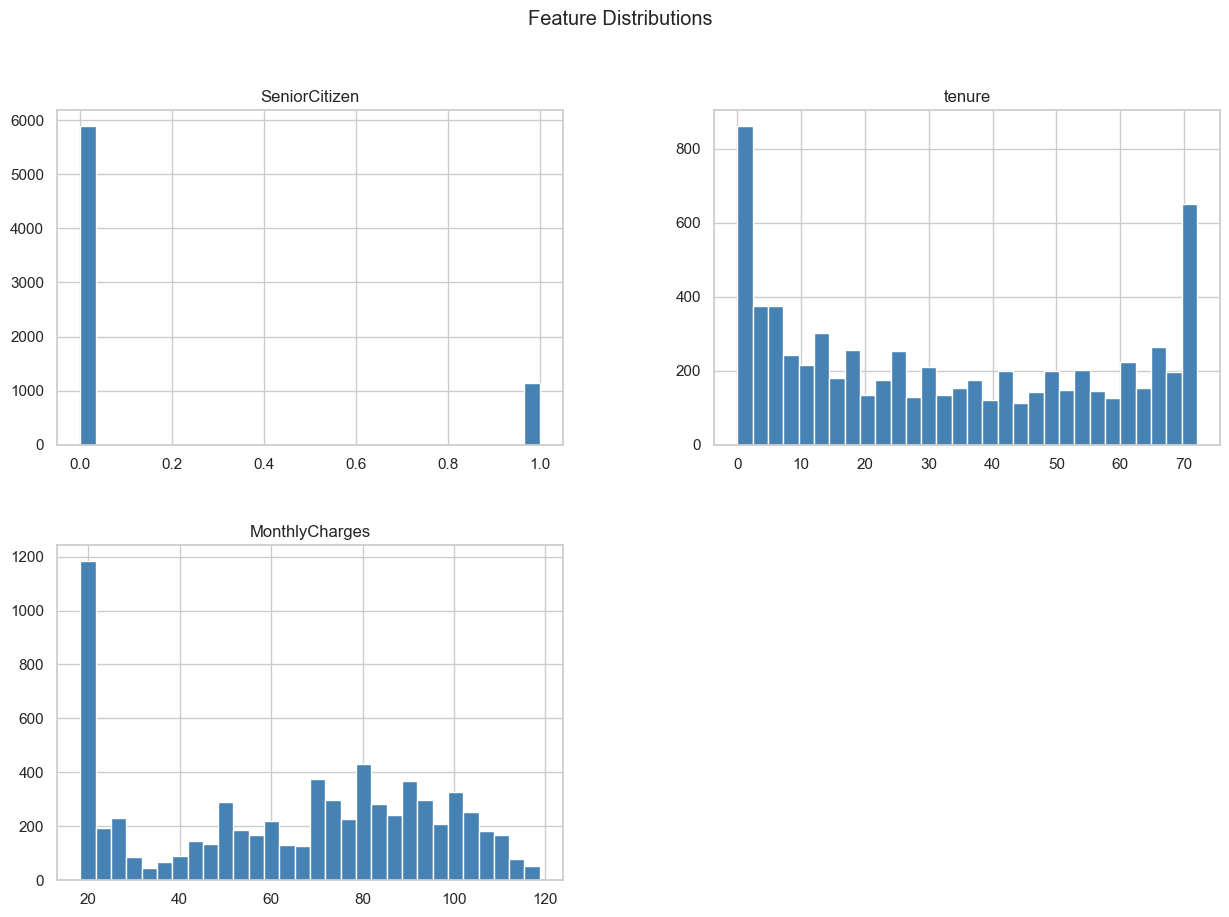

In [62]:
# Distribution of numerical features
data.hist(bins=30, figsize=(15, 10), color="steelblue")
plt.suptitle('Feature Distributions')
plt.show()

In [63]:
# Preprocessing
# Encode Categorical Features
categorical_features = data.select_dtypes(include=['object']).columns
for col in categorical_features:
    if col != 'Churn':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

In [64]:
# Encode the target variable
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [65]:
# Feature Scaling
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Churn')
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [66]:
# Splitting Data into Training and Testing Sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Model Building and Evaluation
# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Model 2: Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Model 3: XGBoost Classifier
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)  
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Model 4: LightGBM Classifier
lgbm_clf = LGBMClassifier(random_state=42)
lgbm_clf.fit(X_train, y_train)
y_pred_lgbm = lgbm_clf.predict(X_test)

# Model 5: CatBoost Classifier
cat_clf = CatBoostClassifier(verbose=0, random_state=42)  
cat_clf.fit(X_train, y_train)
y_pred_cat = cat_clf.predict(X_test)

# Adding More Models
# Model 6: Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

# Model 7: Support Vector Classifier
svc_clf = SVC(probability=True, random_state=42)  
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)

# Model 8: K-Nearest Neighbors
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Model 9: AdaBoost Classifier
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

# Model 10: Extra Trees Classifier
et_clf = ExtraTreesClassifier(random_state=42)
et_clf.fit(X_train, y_train)
y_pred_et = et_clf.predict(X_test)

# Model 11: Gaussian Naive Bayes
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
y_pred_gnb = gnb_clf.predict(X_test)

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


C:\Users\KarimOsman\anaconda3\envs\MLOPs_env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [68]:
# Evaluation Metrics
models_dir = 'models'
os.makedirs(models_dir, exist_ok=True)

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf,
    "LightGBM": lgbm_clf,
    "CatBoost": cat_clf,
    "Gradient Boosting": gb_clf,
    "Support Vector Classifier": svc_clf,
    "K-Nearest Neighbors": knn_clf,
    "AdaBoost": ada_clf,
    "Extra Trees": et_clf,
    "Gaussian Naive Bayes": gnb_clf
}

In [69]:

# Create a dictionary to hold predictions
predictions = {}

# Fit models and store predictions
for model_name, model in models.items():
    y_pred = model.predict(X_test)  # Make predictions
    predictions[model_name] = y_pred  # Store predictions in a separate dictionary

# Comparing Models
for model_name, y_pred in predictions.items():
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, models[model_name].predict_proba(X_test)[:, 1]))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.8161816891412349
ROC AUC Score: 0.8604617160247188
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix:
 [[940  96]
 [163 210]]

Model: Random Forest
Accuracy: 0.8005677785663591
ROC AUC Score: 0.8346820106203486
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[945  91]
 [190 183]]

Model: XGBoost
Accuracy: 0.7927608232

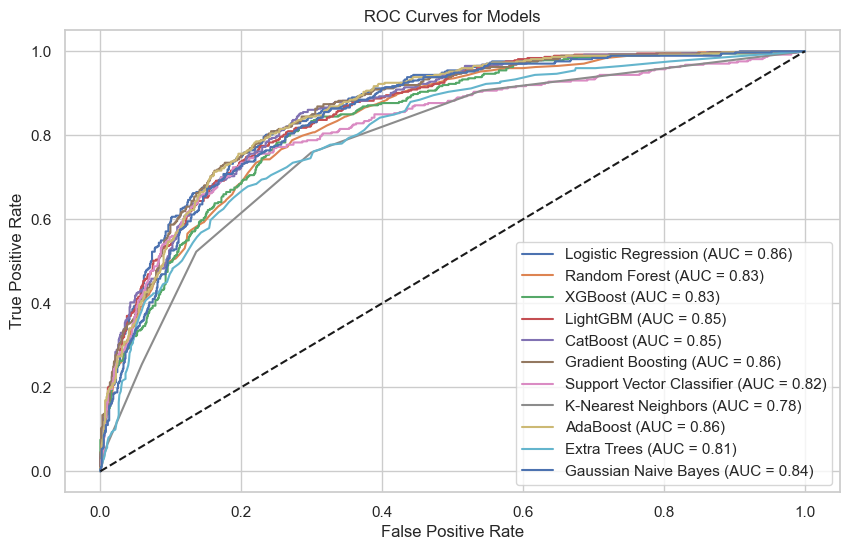

In [70]:
# ROC Curves for each model
for model_name, model in models.items():
    # Calculate the False Positive Rate and True Positive Rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f})")

# Plotting the diagonal for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend()
plt.show()

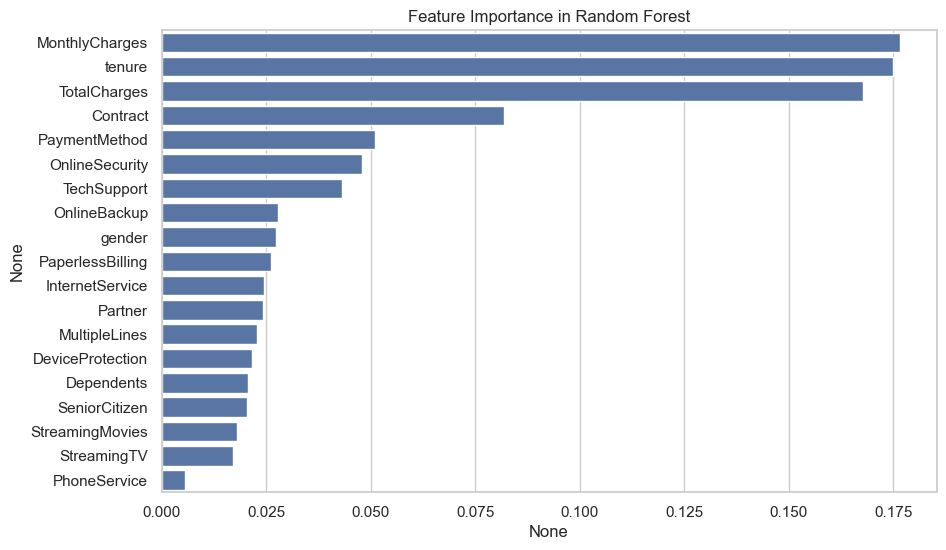

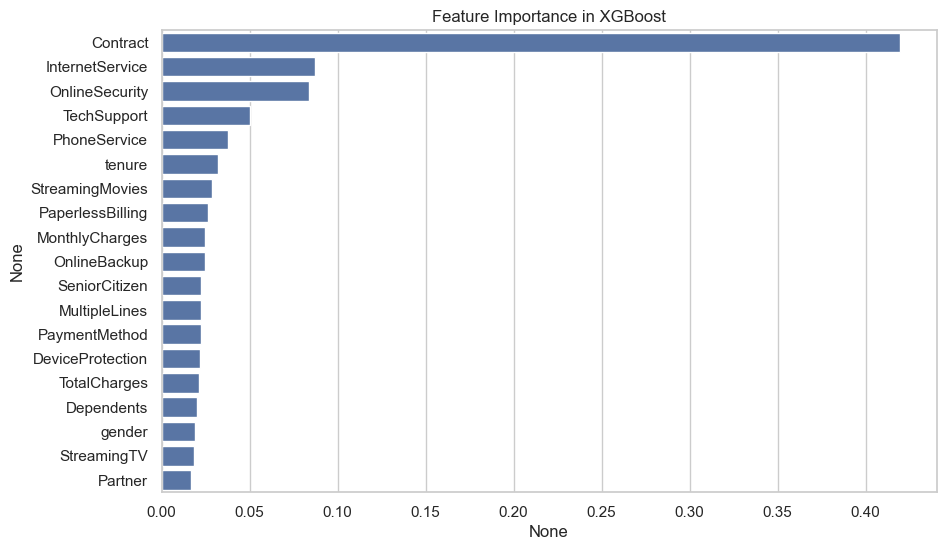

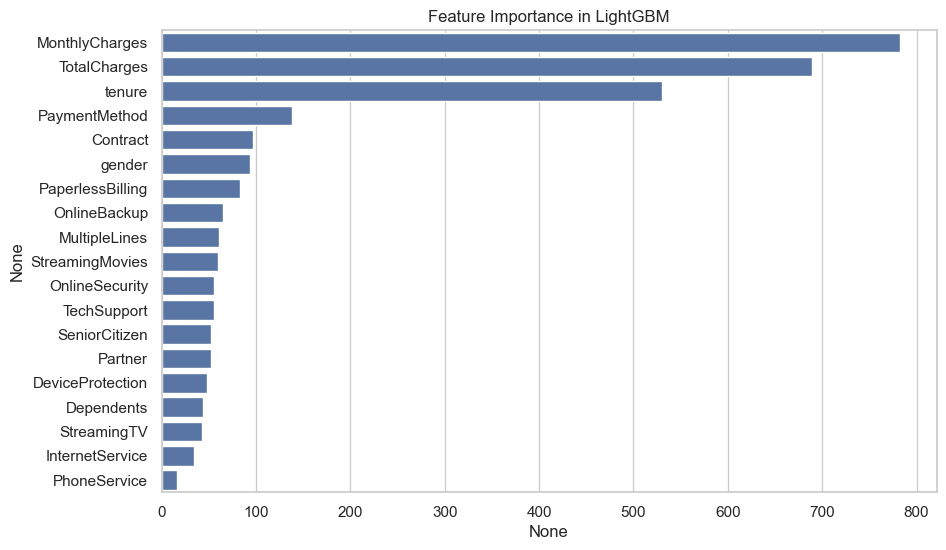

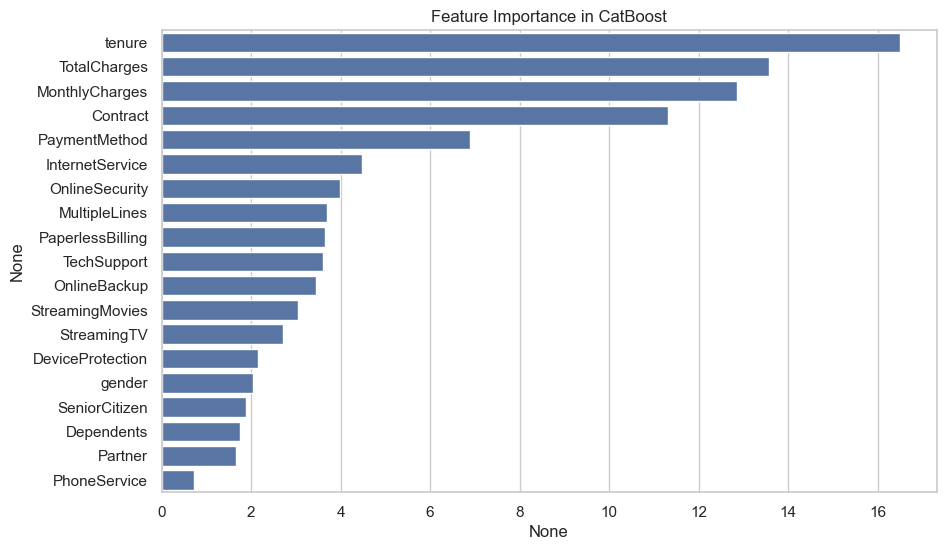

In [71]:
# Feature Importance Analysis for Random Forest and XGBoost
def plot_feature_importance(model, model_name, features):
    feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.title(f"Feature Importance in {model_name}")
    plt.show()
#plot_feature_importance(log_reg, "Logistic Regression", X.columns)
plot_feature_importance(rf_clf, "Random Forest", X.columns) 
plot_feature_importance(xgb_clf, "XGBoost", X.columns)
plot_feature_importance(lgbm_clf, "LightGBM", X.columns)
plot_feature_importance(cat_clf, "CatBoost", X.columns)


In [72]:
metrics = []
for model_name, model in models.items():
    y_pred = model.predict(X_test)  # Make predictions
    y_pred_proba = model.predict_proba(X_test)[:, 1] 
    # Save the model to the models directory
    joblib.dump(model, os.path.join(models_dir, f"{model_name.replace(' ', '_')}.joblib"))
    
# Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    # Append metrics to the list
    metrics.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })


In [73]:

# Convert metrics list to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Display the metrics DataFrame
print(metrics_df)

                        Model  Accuracy   ROC AUC  Precision    Recall  \
0         Logistic Regression  0.816182  0.860462   0.808291  0.816182   
1               Random Forest  0.800568  0.834682   0.788994  0.800568   
2                     XGBoost  0.792761  0.834293   0.785055  0.792761   
3                    LightGBM  0.811214  0.852315   0.801757  0.811214   
4                    CatBoost  0.799858  0.854884   0.789177  0.799858   
5           Gradient Boosting  0.811214  0.858503   0.801757  0.811214   
6   Support Vector Classifier  0.806955  0.819102   0.795833  0.806955   
7         K-Nearest Neighbors  0.773598  0.781452   0.766935  0.773598   
8                    AdaBoost  0.805536  0.857114   0.797669  0.805536   
9                 Extra Trees  0.784954  0.805853   0.770596  0.784954   
10       Gaussian Naive Bayes  0.757984  0.844539   0.803170  0.757984   

    F1 Score  
0   0.809991  
1   0.789857  
2   0.787758  
3   0.802914  
4   0.791059  
5   0.802914  
6   0.

In [74]:
best_model = metrics_df.loc[metrics_df['Accuracy'].idxmax()]
print("\nBest Model Based on Accuracy:")
print(best_model)


Best Model Based on Accuracy:
Model        Logistic Regression
Accuracy                0.816182
ROC AUC                 0.860462
Precision               0.808291
Recall                  0.816182
F1 Score                0.809991
Name: 0, dtype: object


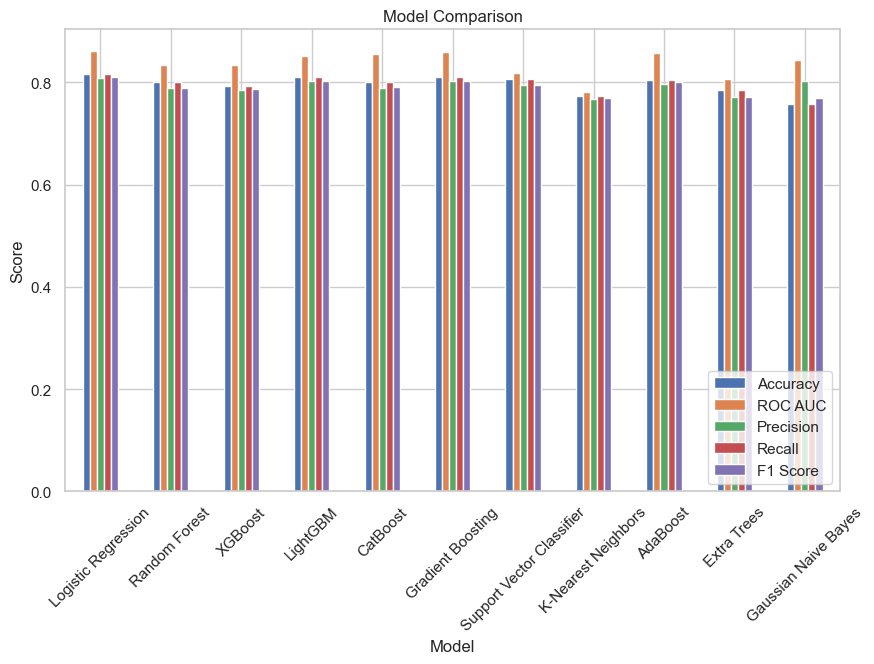

In [75]:
# Optional: Plotting the metrics for visualization
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()